In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader.yahoo.daily import YahooDailyReader
import yfinance as yf

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['GOOG','MSFT']

# Set up End and Start times for data grab

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [GOOG, MSFT]
company_name = ["GOOGLE", "MSFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-08,273.200012,276.760010,266.209991,266.730011,266.063599,54686000,MSFT
2023-02-09,273.799988,273.980011,262.799988,263.619995,262.961365,42375100,MSFT
2023-02-10,261.529999,264.089996,260.660004,263.100006,262.442657,25760900,MSFT
2023-02-13,267.640015,274.600006,267.149994,271.320007,270.642120,44630900,MSFT
2023-02-14,272.670013,274.970001,269.279999,272.170013,271.490021,37047900,MSFT
2023-02-15,268.320007,270.730011,266.179993,269.320007,269.320007,28962200,MSFT
2023-02-16,264.019989,266.739990,261.899994,262.149994,262.149994,29603600,MSFT
2023-02-17,259.390015,260.089996,256.000000,258.059998,258.059998,29979600,MSFT
2023-02-21,254.479996,255.490005,251.589996,252.669998,252.669998,28397400,MSFT


In [3]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,120.294922,121.690609,118.933330,120.307610,120.307610,2.699566e+07
std,18.057653,17.964361,17.979329,17.972444,17.972444,1.062864e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,103.619497,105.084749,102.375628,103.887501,103.887501,2.013650e+07
50%,118.453999,119.931000,117.117699,118.825001,118.825001,2.462850e+07
75%,137.111145,138.404129,135.722248,137.012375,137.012375,3.109508e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,9.779860e+07


In [4]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2021-02-23 to 2023-02-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          504 non-null    float64
 1   High          504 non-null    float64
 2   Low           504 non-null    float64
 3   Close         504 non-null    float64
 4   Adj Close     504 non-null    float64
 5   Volume        504 non-null    int64  
 6   company_name  504 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.5+ KB


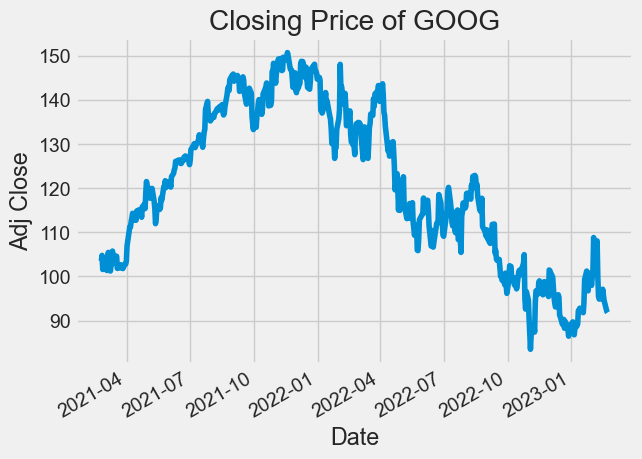

In [5]:
GOOG['Adj Close'].plot()
plt.ylabel("Adj Close")
plt.xlabel("Date")
plt.title('Closing Price of GOOG')

plt.show()

In [6]:
df = DataReader('GOOG', data_source='stooq', start='2014-01-01', end=datetime.now())


In [7]:
#df.sort_values()

Text(0, 0.5, 'Close Price (USD)')

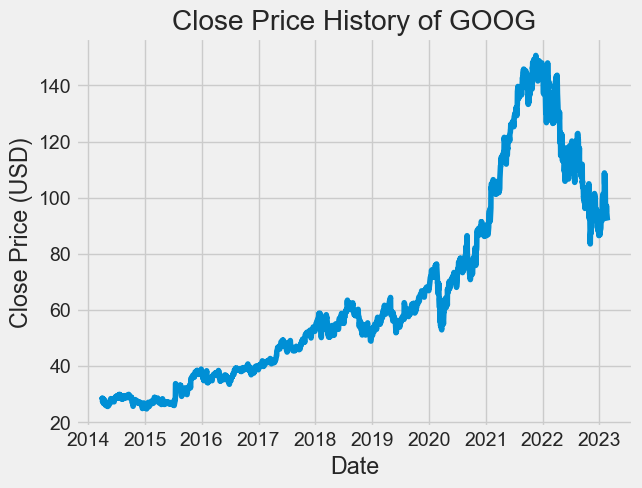

In [8]:
plt.title('Close Price History of GOOG')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')

In [9]:
data = df.filter(items=['Close'])[-1::-1]
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))
training_data_len

1795

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02613786],
       [0.02674461],
       [0.02554697],
       ...,
       [0.55489901],
       [0.53475331],
       [0.53277047]])

In [11]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


dat_size = 100

for i in range(dat_size, len(train_data)):
    x_train.append(train_data[i-dat_size:i, 0])
    y_train.append(train_data[i, 0])
    if i<= dat_size+1:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037,
       0.01919393, 0.01508945, 0.01585086, 0.01740541, 0.02537644,
       0.01727057, 0.01430424, 0.016759  , 0.013638  , 0.01293211,
       0.00937092, 0.00975559, 0.0139394 , 0.01352696, 0.01538687,
       0.01403061, 0.01398302, 0.00895849, 0.00690426, 0.0073167 ,
       0.01038217, 0.01481978, 0.0160769 , 0.013523  , 0.01087788,
       0.01113565, 0.01439942, 0.01476029, 0.01839683, 0.02082383,
       0.02385362, 0.02910816, 0.02741481, 0.0267803 , 0.02670495,
       0.0243414 , 0.02077624, 0.0206652 , 0.0243295 , 0.02529316,
       0.0275893 , 0.02696668, 0.02628855, 0.02331825, 0.02348084,
       0.02051451, 0.02001087, 0.02411932, 0.02472607, 0.02530506,
       0.02871159, 0.02858072, 0.03414458, 0.03309367, 0.03358542,
       0.03280814, 0.03573879, 0.03560792, 0.03655572, 0.03557223,
       0.03114652, 0.0331254 , 0.03115049, 0.03435476, 0.0366

(1695, 100, 1)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [13]:

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1695/1695 [==============================] - 113s 61ms/step - loss: 8.2353e-04


In [14]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - dat_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(dat_size, len(test_data)):
    x_test.append(test_data[i-dat_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

14/14 [==============================] - 3s 57ms/step


6.556976471852405

C:\Users\rjrob\AppData\Local\Temp\ipykernel_18448\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


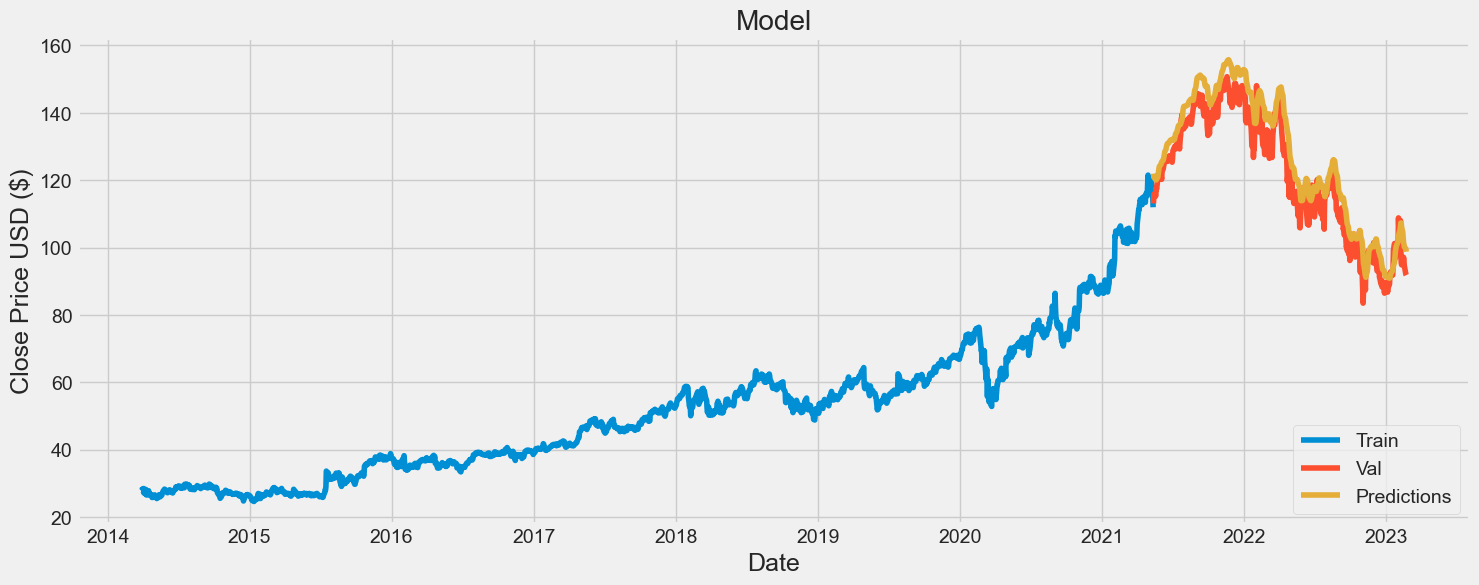

In [15]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import RNN, LSTMCell
from tensorflow.keras.backend import dot
from tensorflow.keras import activations, initializers

In [17]:
class LSTM(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = [self.units, self.units]
        
        self.activation = activations.get('tanh')
        self.recurrent_activation = activations.get('hard_sigmoid')
        self.kernel_initializer = initializers.get('glorot_uniform')
        self.recurrent_initializer = initializers.get('orthogonal')
        self.bias_initializer = initializers.get('zeros')
        
        super(LSTM, self).__init__(**kwargs)

    def build(self, input_shape):
        self.ft = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ft')
        self.ft_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='ft_b')
        self.c = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ct')
        self.c_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='c_b')
        self.o = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ot')
        self.o_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='o_b')
        self.it = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='it')
        self.it_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='i_b')

        self.built = True

    def call(self, inputs, states):
        h,c = states[0], states[1]
        
        x = tf.concat([h,inputs], axis=-1)
        
        y_ft = self.recurrent_activation(dot(x, self.ft) + self.ft_b)
        
        y_it = self.recurrent_activation(dot(x, self.it) + self.it_b)
        
        y_c = self.activation(dot(x, self.c) + self.c_b)
        
        
        c = c * y_ft + y_it * y_c
        
        y_o = self.recurrent_activation(dot(x, self.o) + self.o_b)
        
        
        h = y_o * self.activation(c)
        
        output = h
        
        return output, [h,c]

In [18]:
# Build the LSTM model
cell = LSTM(8)
layer = RNN(cell, return_sequences=True)

cell2 = LSTM(300)
layer2 = RNN(cell2, return_sequences=False)
model = Sequential()
model.add(layer)
model.add(layer2)
model.add(Dense(35))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\rjrob\anaconda3\envs\cvqml\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


1695/1695 [==============================] - 268s 151ms/step - loss: 7.2167e-04


In [19]:
#Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - dat_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(dat_size, len(test_data)):
    x_test.append(test_data[i-dat_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)


# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

forecast = np.zeros([len(x_test), 1])
x_now = x_test[0].reshape(1,x_test.shape[1],1)
print(x_now[0])
for i in range(len(forecast)):
    x_ = model.predict(x_now)
        
    forecast[i] = x_
    
    x_now[:][:-1] = x_now[:][1:]
    if (i%len(forecast) == 0):
        x_now[:][-1] = x_test[i]
    else:
        x_now[:][-1] = x_

print(x_now[0])

forecast = scaler.inverse_transform(forecast)


# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

rmse2 = np.sqrt(np.mean(((forecast - y_test) ** 2)))
print(rmse2)

14/14 [==============================] - 5s 88ms/step
[[0.49783275]
 [0.4911347 ]
 [0.49445002]
 [0.48815647]
 [0.491678  ]
 [0.4942438 ]
 [0.50901203]
 [0.50212363]
 [0.4945095 ]
 [0.4994111 ]
 [0.49003621]
 [0.4950647 ]
 [0.49283202]
 [0.51343774]
 [0.52135325]
 [0.50529618]
 [0.49729738]
 [0.50041045]
 [0.49477124]
 [0.49318893]
 [0.51486935]
 [0.55295583]
 [0.5546809 ]
 [0.55856728]
 [0.55791294]
 [0.56498773]
 [0.53070435]
 [0.54352145]
 [0.53266736]
 [0.55868625]
 [0.56906049]
 [0.62559931]
 [0.6225378 ]
 [0.63667152]
 [0.63465695]
 [0.6309292 ]
 [0.63563251]
 [0.63583079]
 [0.63909852]
 [0.64614951]
 [0.64869549]
 [0.64428564]
 [0.63791674]
 [0.62353716]
 [0.62590864]
 [0.63554526]
 [0.61024417]
 [0.6124253 ]
 [0.63013606]
 [0.62788355]
 [0.60840409]
 [0.6172793 ]
 [0.64085135]
 [0.60738887]
 [0.61870695]
 [0.61963492]
 [0.64331801]
 [0.62236331]
 [0.62417167]
 [0.63449832]
 [0.63392726]
 [0.61217149]
 [0.61493954]
 [0.61310739]
 [0.61881006]
 [0.61567716]
 [0.61539956]
 [0.6119

1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 100ms/step
[[0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661053]
 [0.54661

In [22]:
x_now.shape

(1, 100, 1)

C:\Users\rjrob\AppData\Local\Temp\ipykernel_18448\1784730816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
C:\Users\rjrob\AppData\Local\Temp\ipykernel_18448\1784730816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Forecast'] = forecast


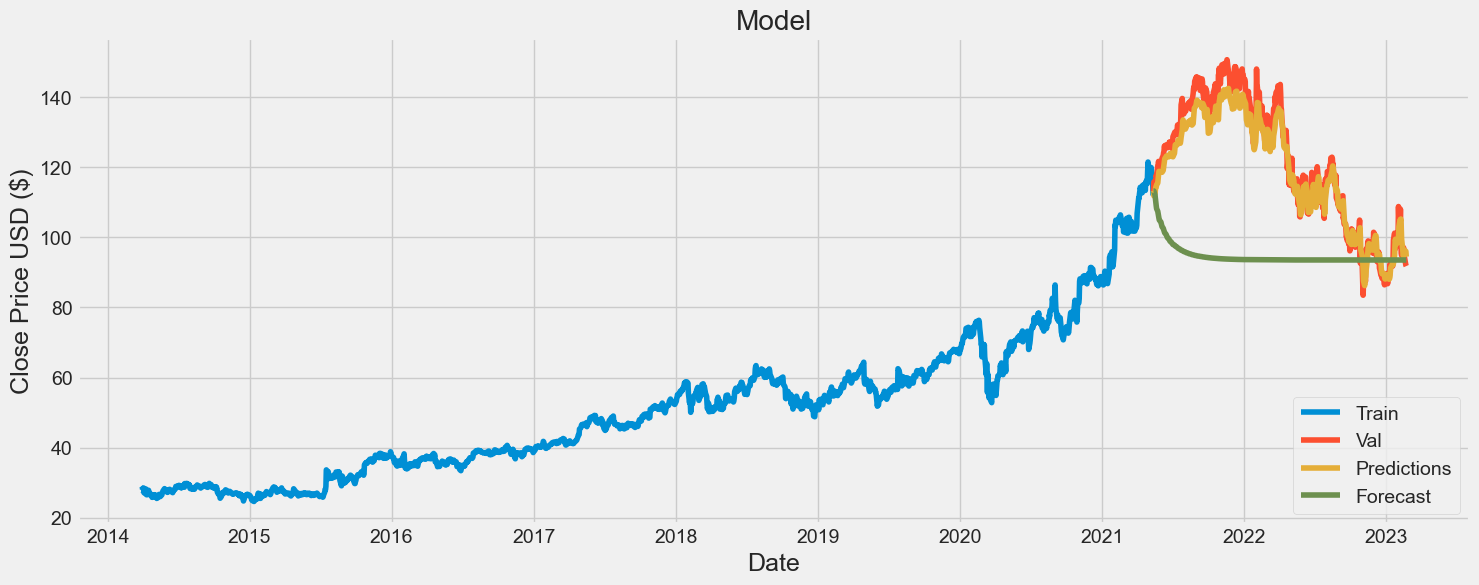

In [20]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Forecast'] = forecast
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions', 'Forecast']])
plt.legend(['Train', 'Val', 'Predictions', 'Forecast'], loc='lower right')
plt.show()

C:\Users\rjrob\AppData\Local\Temp\ipykernel_18448\178313092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
C:\Users\rjrob\AppData\Local\Temp\ipykernel_18448\178313092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Forecast'] = forecast


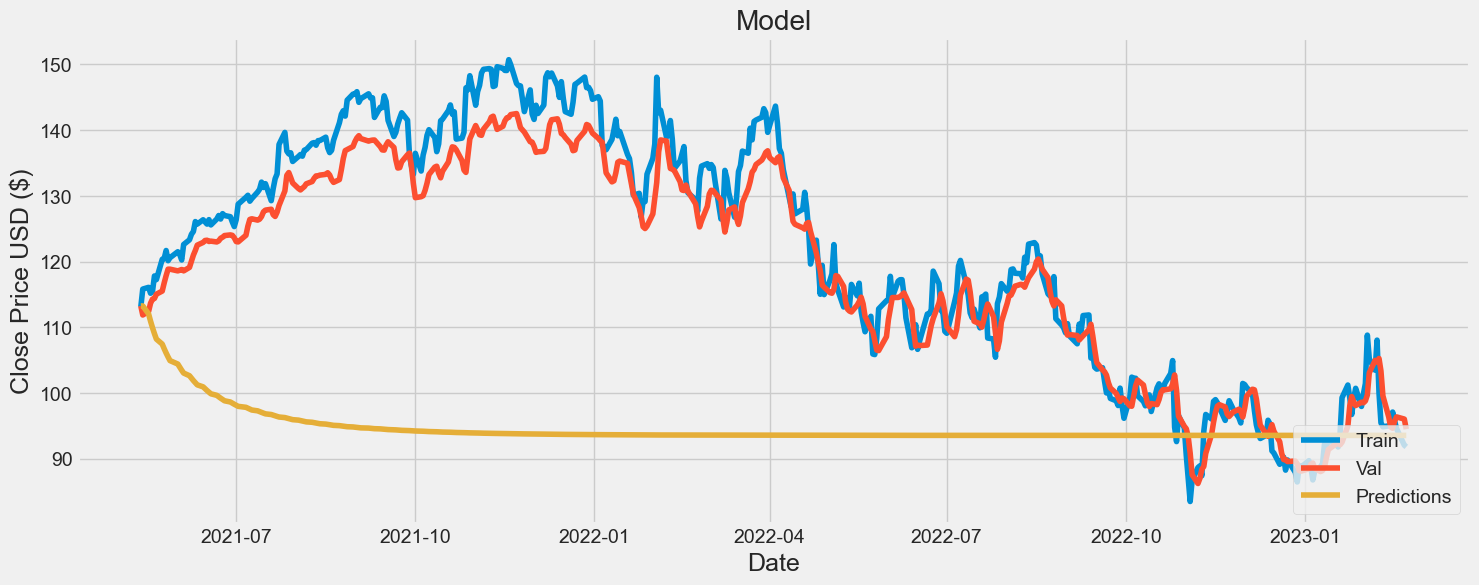

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Forecast'] = forecast
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#10plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions', 'Forecast']])
plt.legend(['Train', 'Val', 'Predictions', 'Forecast'], loc='lower right')
plt.show()